In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

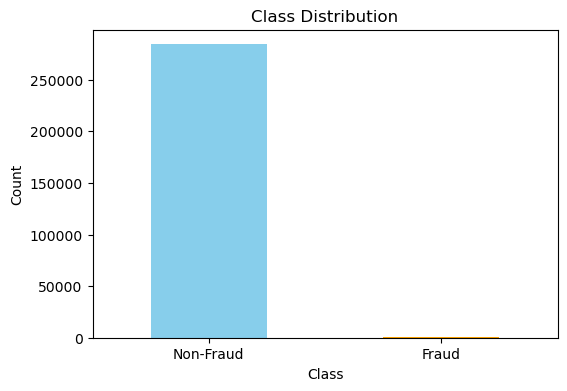

In [12]:
class_counts = df['Class'].value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

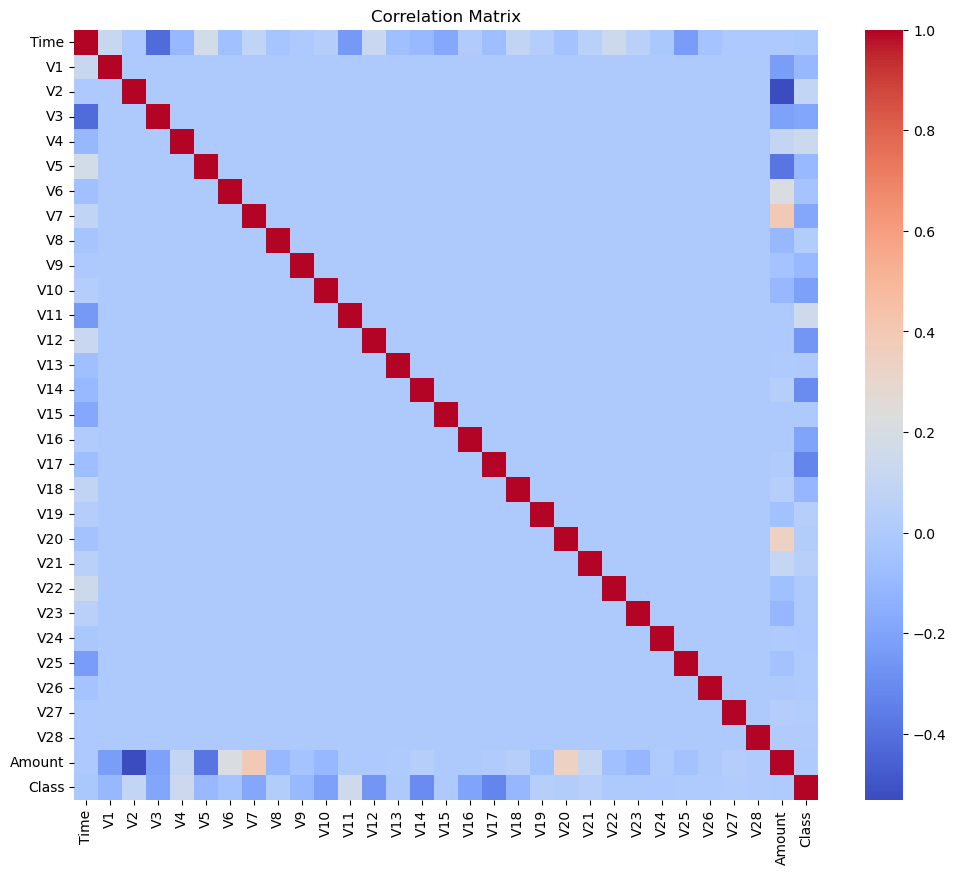

In [16]:
plt.figure(figsize=(12,10))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

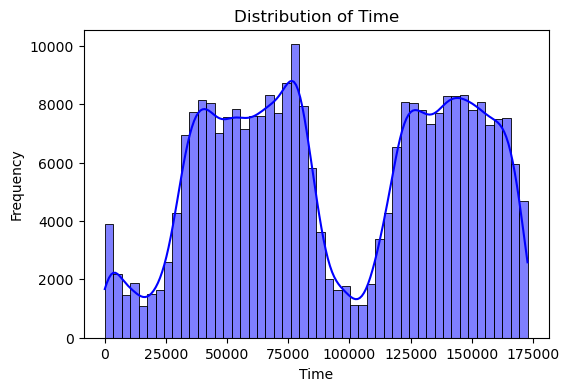

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

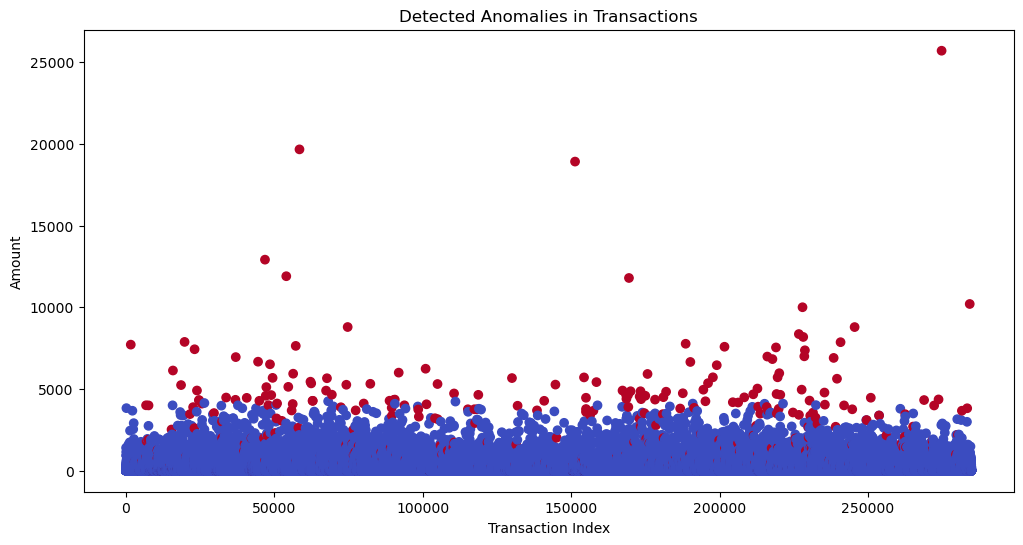

In [32]:
plt.figure(figsize=(12,6))
plt.scatter(df.index, df['Amount'], c=df['anomaly'], cmap='coolwarm')
plt.title("Detected Anomalies in Transactions")
plt.xlabel("Transaction Index")
plt.ylabel("Amount")
plt.show()

In [19]:
X = df.drop(['Class', 'Transaction_Type'], axis=1, errors='ignore')

In [20]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=100,
    contamination=0.002,
    random_state=42
)

model.fit(X)

IsolationForest(contamination=0.002, random_state=42)

In [21]:
df['anomaly'] = model.predict(X)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction_Type,anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Normal,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Normal,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Normal,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Normal,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Normal,1


In [22]:
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

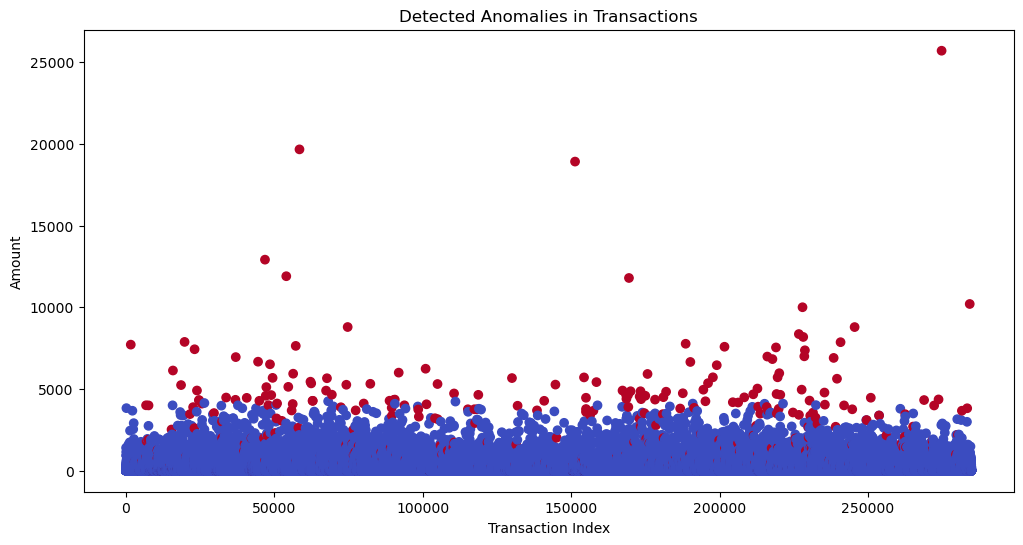

In [23]:
plt.figure(figsize=(12,6))

plt.scatter(df.index, df['Amount'], c=df['anomaly'], cmap='coolwarm')

plt.title("Detected Anomalies in Transactions")
plt.xlabel("Transaction Index")
plt.ylabel("Amount")

plt.show()

C:\Users\theya\AppData\Local\Temp\ipykernel_14776\3252377190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transaction_Type', y='Amount', data=df, palette=['green', 'red'])


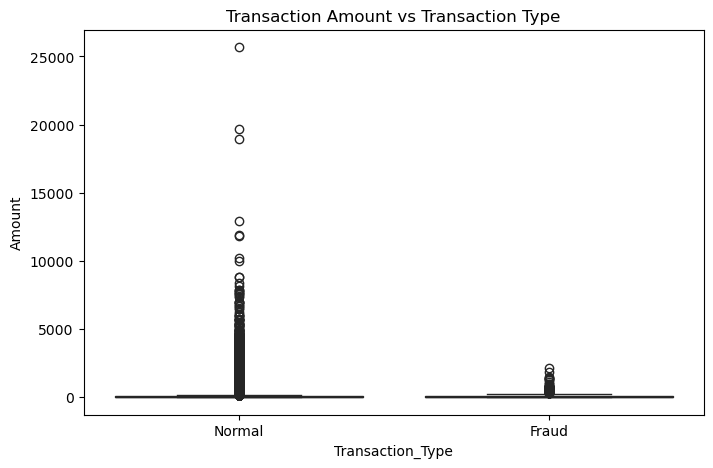

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Transaction_Type', y='Amount', data=df, palette=['green', 'red'])
plt.title("Transaction Amount vs Transaction Type")
plt.show()

In [25]:
print("Total transactions:", len(df))
print("Total anomalies detected:", df['anomaly'].sum())

Total transactions: 284807
Total anomalies detected: 570


In [26]:
anomalies = df[df['anomaly'] == 1]
anomalies.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction_Type,anomaly
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0,Normal,1
2963,2507.0,-6.200114,5.025406,-2.742492,-0.940903,-6.656259,5.432294,-9.198175,-22.588547,-3.244295,...,1.943002,0.846005,-1.343379,-0.707634,-0.210219,0.066529,544.62,0,Normal,1
4608,3967.0,-7.896534,6.224859,-2.913981,-4.154047,1.171430,2.749061,0.031022,0.749092,7.783716,...,0.366454,0.840169,1.469106,0.786302,3.294538,1.681022,1.46,0,Normal,1
5425,5406.0,-8.733429,-5.681953,2.253879,3.930311,-0.916149,4.355297,5.400286,-4.994383,6.819787,...,-1.428302,-0.030181,-0.029485,-0.264455,-7.976100,4.712560,553.60,0,Normal,1
6624,8130.0,-9.175447,7.906022,-2.068334,-0.901683,-2.178911,4.675277,-8.314425,-22.605711,3.095693,...,3.638520,-0.533970,0.428590,0.222205,1.159270,0.179528,23.98,0,Normal,1
6783,8544.0,-6.571336,-11.943892,-4.246322,6.825816,-2.896624,2.706661,5.373923,-0.872187,-0.626203,...,-3.731391,-1.015761,-0.740824,-0.297883,-0.793710,0.680622,4002.88,0,Normal,1
6812,8592.0,-23.066842,-25.640527,-3.080313,4.866932,6.901397,-4.074335,2.027345,-2.688652,3.402966,...,13.876221,-0.572177,5.525093,0.906980,3.358822,3.553906,845.73,0,Normal,1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1,Fraud,1
7485,10201.0,-9.507807,-6.332182,-2.347929,5.909158,-1.946121,2.347826,-2.895307,-8.933411,0.512017,...,-10.477978,0.461380,-2.160800,0.327158,4.173387,-3.054085,1895.88,0,Normal,1
7617,10538.0,-6.487286,-13.630449,-3.190735,2.890879,-5.115535,2.393873,3.759791,-0.587387,0.816890,...,-3.435921,-0.125621,-1.311011,-0.663526,-0.702356,0.694100,3995.92,0,Normal,1


In [27]:
pd.crosstab(df['Class'], df['anomaly'])

anomaly,0,1
Class,,
0,283883,432
1,354,138


In [28]:
from sklearn.metrics import classification_report

print(classification_report(df['Class'], df['anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.28      0.26       492

    accuracy                           1.00    284807
   macro avg       0.62      0.64      0.63    284807
weighted avg       1.00      1.00      1.00    284807



In [29]:
df.to_csv("credit_card_anomaly_results.csv", index=False)

In [33]:
anomaly_percent = (df['anomaly'].sum() / len(df)) * 100
print("Anomaly percentage:", anomaly_percent, "%")

Anomaly percentage: 0.20013553037671125 %
